In [1]:
# data preprocessing, visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [2]:
%run 0-Function-Helper.ipynb

In [3]:
df_merged = pd.read_csv("../data/merged_datasetes_balanced_huge.csv")

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    df_merged["title"], 
    df_merged["clickbait"],
    test_size=0.2, 
    random_state=42
)

x_test, x_val, y_test, y_val = train_test_split(
    x_test, 
    y_test,
    test_size=0.5,  # 50% of the original x_test size for validation
    random_state=42,
    stratify=y_test
)

In [7]:
tokenizer = AutoTokenizer.from_pretrained("christinacdl/XLM_RoBERTa-Clickbait-Detection-new")
model = AutoModelForSequenceClassification.from_pretrained(
    "christinacdl/XLM_RoBERTa-Clickbait-Detection-new"
)

C:\Users\Mateusz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Mateusz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Mateusz\.cache\huggingface\hub\models--christinacdl--XLM_RoBERTa-Clickbait-Detection-new. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https

In [16]:

texts = x_val.tolist()


inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

probs = F.softmax(logits, dim=-1)

for text, prob in zip(texts, probs):
    print(f"Text: {text}")
    print(f"Probability of being clickbait: {prob[1]:.4f}, Non-clickbait: {prob[0]:.4f}")

Text: Crucifixes can be displayed in state schools, European court rules
Probability of being clickbait: 0.0001, Non-clickbait: 0.9999
Text: Can 'antacids' tackle climate change? Scientists say aerosols could cool the planet without ozone damage
Probability of being clickbait: 0.0599, Non-clickbait: 0.9401
Text: My Best Friend's Wedding Might Be Getting A TV Show Sequel
Probability of being clickbait: 1.0000, Non-clickbait: 0.0000
Text: How Much Of A Dick Are You
Probability of being clickbait: 1.0000, Non-clickbait: 0.0000
Text: Moto GP rider Marco Simoncelli dies in 2011 Malaysia Grand Prix
Probability of being clickbait: 0.0001, Non-clickbait: 0.9999
Text: 22 Breakout Movie Stars of 2016
Probability of being clickbait: 0.9999, Non-clickbait: 0.0001
Text: 15 Insanely Cool Gifts No Sane Person Can Refuse
Probability of being clickbait: 1.0000, Non-clickbait: 0.0000
Text: Donald Trump’s state visit to the UK could be moved from London to the Midlands
Probability of being clickbait: 0.0

In [17]:
probs[]

tensor([[9.9987e-01, 1.3280e-04],
        [9.4006e-01, 5.9935e-02],
        [4.2790e-05, 9.9996e-01],
        ...,
        [6.1345e-05, 9.9994e-01],
        [2.3425e-05, 9.9998e-01],
        [2.8142e-05, 9.9997e-01]])

In [27]:
prob_bert = probs[:,1].tolist()

In [28]:
pred_bert = torch.argmax(probs, dim=1).numpy() 

In [29]:
pred_bert = pred_bert.tolist()

0.832 & 0.795 & 0.894 & 0.842 & 0.91 \
{'Accuracy': 0.83225, 'Precision': 0.7948260481712757, 'Recall': 0.8941294530858003, 'F1 Score': 0.8415584415584416, 'ROC-AUC': 0.9101890248155539}

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      2007
           1       0.79      0.89      0.84      1993

    accuracy                           0.83      4000
   macro avg       0.84      0.83      0.83      4000
weighted avg       0.84      0.83      0.83      4000



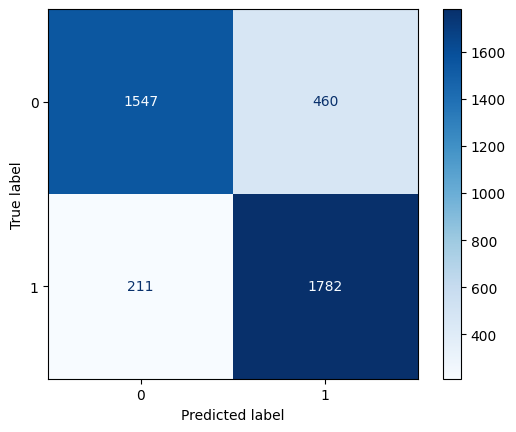

In [30]:
create_summary_for_model_metrics(y_val, pred_bert, prob_bert)